In [1]:
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None,2]

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

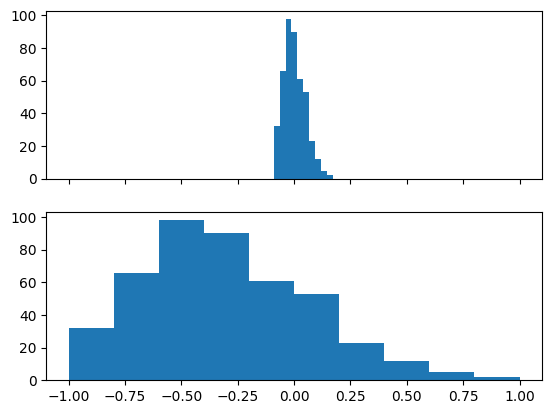

In [2]:
#reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)
fig, axs = plt.subplots(2, 1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled)

In [3]:
#modelos de escalamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [4]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print("train raw : {}".format(raw_time))
print("train scaled : {}".format(scaled_time))

train raw : 0.06478606100063189
train scaled : 0.04858560899992881


max-min scaling: mejor para datos uniformemente distribuidos

z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

# Transformaciones no lineales

In [5]:
df = pd.read_csv("/work/archive/cars.csv")

<AxesSubplot: >

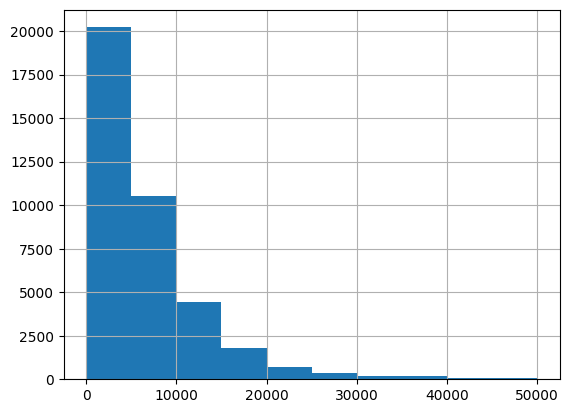

In [6]:
df.price_usd.hist()

Transformación con tanh(z)

<AxesSubplot: >

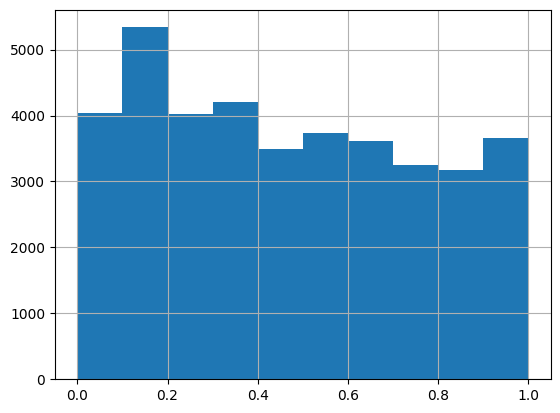

In [7]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d97edfb7-071f-4b23-9a43-44b1e4999064' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>